In [24]:
import pandas as pd
import numpy as np
import plotly
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp
import json
import geopandas as gpd
import plotly.express as px

In [17]:
df=pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data')

In [18]:
df.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


In [26]:
#use geopandas to convert lat and long into points
df_geo=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.LNG,df.LAT))

In [27]:
df_geo

,ZIP,LAT,LNG,geometry
0,601,18.180555,-66.749961,POINT (-66.74996 18.18055)
1,602,18.361945,-67.175597,POINT (-67.17560 18.36194)
2,603,18.455183,-67.119887,POINT (-67.11989 18.45518)
3,606,18.158345,-66.932911,POINT (-66.93291 18.15835)
4,610,18.295366,-67.125135,POINT (-67.12514 18.29537)
...,...,...,...,...
33139,99923,56.002315,-130.041026,POINT (-130.04103 56.00232)
33140,99925,55.550204,-132.945933,POINT (-132.94593 55.55020)
33141,99926,55.138352,-131.470424,POINT (-131.47042 55.13835)
33142,99927,56.239062,-133.457924,POINT (-133.45792 56.23906)


In [28]:
#get built in dataset from geopands
world_data=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

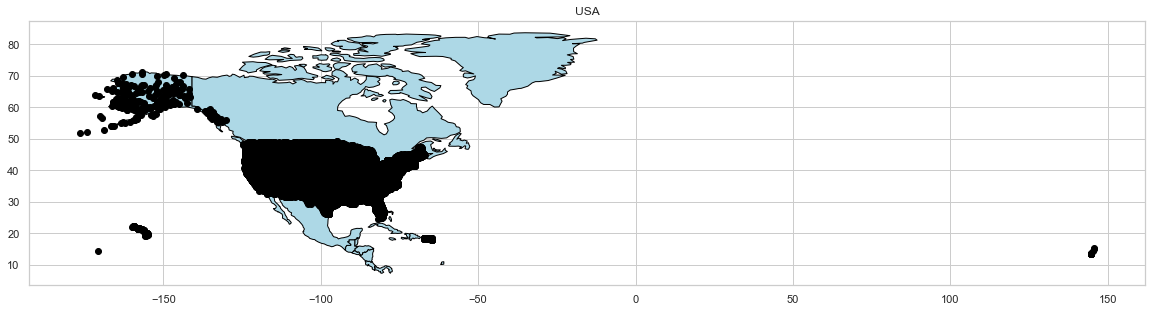

In [94]:
#plot world map
axis=world_data[world_data.continent=='North America'].plot(color='lightblue',edgecolor='black')
df_geo.plot(ax=axis,color='black')
plt.title('USA')

fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()


In [2]:
import folium as f
import pandas as pd

In [3]:
df2=pd.read_csv('https://raw.githubusercontent.com/jtemporal/folium-101/main/cities.csv')

In [4]:
df2

,name,latitude,longitude,lived,visited
0,Olinda,-7.998127,-34.908203,yes,yes
1,Recife,-8.052200,-34.928600,yes,yes
2,Miami,25.761700,-80.191800,no,yes
3,New York,40.712800,-74.006000,yes,yes
4,Graz,47.070700,15.439500,no,yes
5,Taipei,25.033000,121.565400,no,yes
6,São Paulo,-23.550500,-46.633300,no,yes
7,Osasco,-23.537200,-46.796200,yes,yes
8,Ribeirão Preto,-21.170400,-47.810300,yes,yes
9,Florianópolis,-27.598600,-48.518700,no,yes


In [10]:
len(df2)

22

In [11]:
my_map=f.Map(loaction=[13.133,16.10],
            zoom_start=2)
my_map

In [6]:
city=df2.loc[0]

In [7]:
city

name            Olinda
latitude     -7.998127
longitude   -34.908203
lived              yes
visited            yes
Name: 0, dtype: object

In [40]:
for _,city in df2.iterrows():

    f.Marker(location=[city['latitude'],city['longitude']],
             popup=city['name'],
             tooltip=city['name'],
             icon=f.Icon(color=city['color'],prefix='fa',icon='circle')
            ).add_to(my_map)

In [41]:
#add color to the markers in map
def select_marker_color(row):
    if row['lived']=='yes':
        return 'pink'
    elif row['lived']=='no' and row['visited']=='yes':
        return 'purple'
    return 'blue'

In [42]:
#apply select_marker_color to the df2
df2['color']=df2.apply(select_marker_color,axis=1)
df2.head()

,name,latitude,longitude,lived,visited,color
0,Olinda,-7.998127,-34.908203,yes,yes,pink
1,Recife,-8.052200,-34.928600,yes,yes,pink
2,Miami,25.761700,-80.191800,no,yes,purple
3,New York,40.712800,-74.006000,yes,yes,pink
4,Graz,47.070700,15.439500,no,yes,purple


In [43]:
my_map

In [44]:
my_map.save('map_created.html')